In [1]:
import urllib.request as req
import requests
import csv
import json
import pandas as pd
import numpy as np
import time
from time import sleep 
from bs4 import BeautifulSoup
import jieba
import jieba.analyse

#抓取的網站https://ptthito.com/sijhih/m-1644379271-a-ac7/
url = 'https://www.ptt.cc/bbs/biker/M.1641799905.A.1FA.html'

In [2]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

if response.status_code == 200:
    print(f'請求成功：{response.status_code}')
else:
    print(f'請求失敗：{response.status_code}')

請求成功：200


In [3]:
# 解析文章標題
title_element = soup.select_one("div.title")
title = title_element.text.strip() if title_element else "無法找到標題"

# 解析文章內容
content_element = soup.select_one("div#main-content")
content = content_element.text.strip() if content_element else "無法找到內容"

# 列印文章標題和內容
print("標題:", title)
print("內容:", content)

標題: 無法找到標題
內容: 作者oldman7788 (老人7788)看板biker標題[閒聊] 機車待轉區真的可以廢了時間Mon Jan 10 15:31:43 2022
政府當初設置待轉區，目的是貫徹機慢車靠右騎比較安全政策所衍生出的做法。

標榜「機車直接左轉是很危險的」

可是啊…
台北市新北市有些路段，由於左轉機車流量＞＞＞待轉區所能容納機車數量，於是又開放機
車可以直接左轉

例如

林森北路左轉民權東路
https://i.imgur.com/8Dtm5lH.jpg

三重福德北路左轉上台北橋
https://i.imgur.com/9seB0Nj.jpg

大直明水路左轉北安路
https://i.imgur.com/AdSZqcu.jpg

大直北安路左轉大直橋
https://i.imgur.com/v0OAg0t.jpg

尤有甚者
永和區90％路段，木柵區木新路、木柵路、辛亥路沿線主幹道至少兩線道，也是直接開放機
車直接左轉，理由八成同上

咦？這時候機車直接左轉就變安全了？


然而這幾年下來也沒有那麼多因為左轉而發生事故的機車

待轉是不是一個可以廢除掉的垃圾政策

--
※ 發信站: 批踢踢實業坊(ptt.cc), 來自: 123.194.165.21 (臺灣)
※ 文章網址: https://www.ptt.cc/bbs/biker/M.1641799905.A.1FA.html
※ 編輯: oldman7788 (123.194.165.21 臺灣), 01/10/2022 15:32:55
推 tony24334: 官員不騎機車 唉 49.216.129.209 01/10 15:35
推 sjclivelo: 二線道跟T字路口本來就沒有要兩段式左   211.23.68.75 01/10 15:36
→ sjclivelo: 轉   211.23.68.75 01/10 15:36
推 a151091: 本來就該廢了    39.8.129.28 01/10 15:36
→ LabaEllis: 有的路口要待轉有的不用才是亂源   49.216.4.180 01/10 15:40
推 ludoren: https://i.imgur.com/UNpwoq3.jpg120.126.194.240 01/10 15:41
推 dw

In [4]:
# 提取留言
text = [span.text for span in soup.find_all('span', class_='f3 push-content')]

for item in text:
      print(item)    

#寫入csv檔        
with open("comment.csv", "w",encoding="utf-8") as file:
    writer = csv.writer(file)
    for item in text:
        writer.writerow([item])# 寫入資料行

: 官員不騎機車 唉
: 二線道跟T字路口本來就沒有要兩段式左
: 轉
: 本來就該廢了
: 有的路口要待轉有的不用才是亂源
: https://i.imgur.com/UNpwoq3.jpg
: 本來就是垃圾政策啊，而且新北智障警
: 察最愛抓沒待轉，路邊一排違停佔用一
: 個車道視而不見
: 綠牌不流行了，沒必要強制待轉
: 那些智障警察最愛抓這些歧視二輪的法
: 規
: 官員就把待轉牌當護身符,就算機車T字路
: 口外側車道允許左轉,照樣叫你待轉
: 有左轉燈的可以廢...其他則有待商榷
: 你可以去車版發一篇看看
: 因為左轉燈可讓對向來車靜止,所以安全
: 有左轉燈又要兩段式,才是很北懶的規定
: 有左轉燈和左轉專用道的都應該取消
: 強制待轉, 還有沒有右轉專用燈號的
: 路口都不能設置右轉專用道
: 待轉本來就蠢,不過二輪賤民們還是吞下企吧
: 棺猿：什麼？大聲點聽不見
: 民眾已經被教育的很徹底，有些取消待轉
: 的路口還會有個牌子寫「機慢車可逕行左
: 轉」，真的是世界奇觀
: 雖然我個人也是很希望可以實現，不過以台
: 灣的交通環境而言，難度比上國道高太多太
: 多了
: 台灣的機車用路人有不小群體根本不管什麼
: 叫有效率且安全的觀念，只要亂騎就對了
: 個人覺得左轉燈是不錯的設計，但好
: 像很多人不會看左轉燈，港墘路內湖
: 路的十字路口常常一堆左轉燈還沒亮
: 直接左轉的
: 水準低的用路人，騎車開車都一樣。但台
: 北整體而言已經好很多了，還是跟執法力
: 度有關。
: 有號誌配合才能啊 要不然平常直接左轉
: 真的危險
: 二段式的走法已經根植人心，要改變
: 沒那麼快
: 而且還有外側藍藍路，根本超蠢
: 開車就知道靠左，騎車就不知道？
: 沒看南部一堆二線道插待轉牌的，沒救
: 本來就學人四不像的垃圾制度
: 台灣人已被洗腦的夠徹底 不管怎樣先待
: 轉
: 反正我都直接轉 狗才待轉
: 最慘的是有些可以有些不行，不行直接左轉
: 的待轉牌又智障的設在路口，逼的原本在內
: 車道的摸摸鼻子去下個路口轉，然後對沒帶
: 腦的直接外割造成更多風險
: 看火花羅影片就知道連道路設計都很有問
: 題，待轉只是其中一樣
: 真的是該廢除，考駕照駕照好好教育才
: 是重點
: 三重福德北路左轉上台北橋>有左轉專用燈
: 鄭州路塔城街強制兩段式

In [5]:
import csv
import random

# 讀取留言檔案
com = list()
with open("comment.csv", "r", newline="", encoding="utf-8") as file:
    reader = csv.reader(file)
    next(reader)  # 跳過標題欄位
    for row in reader:
        if row:
            com.append(row[0])  # 假設留言內容在第一個欄位
    
random.shuffle(com)

# 顯示隨機抓取的留言列表
for comment in com:
    print(comment)

: 有的路口要待轉有的不用才是亂源
: 你可以去車版發一篇看看
: 有權力的官出門都不用停紅綠燈的 機
: 很危險的腦袋 根本不用期待變好
: 那些智障警察最愛抓這些歧視二輪的法
: https://i.imgur.com/2K5XLw2.jpg
: 鄭州路塔城街強制兩段式，但是下個路口
: 早該廢了
: 我贊成中華民國 管交通全部官員，全面只
: 腦的直接外割造成更多風險
: 雖然我個人也是很希望可以實現，不過以台
: 為了避免被開單 我2012直接換黃牌
: 直接左轉很危險(x
: 難喔 交通部那群官員還在停留在汽機車混流
: 4錯了 那是給下大直橋左轉北安路待轉格
: 待轉原本就是很廢的東西
: 台灣交通就是被那些人搞爛的
: 就腦殘政策啊
: 路口都不能設置右轉專用道
: 反正我都直接轉 狗才待轉
: 廢掉的話車商怎麼賣汽車跟重機
: 一堆白痴政策
: 台灣交通全盤都有問題，不只是待轉
: 職，讚
: 有待轉標誌或內側車道為禁行機車，才需
: 直接左轉沒被警察攔一樣收罰單啊，提早匯
: 然後又有智障提案待轉和直接左轉並行
: 道路設計考驗是否當地人以及記憶力
: 最智障的牌子:左轉靠左 右轉靠右
: 禁騎內線是要怎麼左轉？鬼切嗎？
: 著待轉很可能被後方車輛撞死
: 本來就不該強制待轉
: 像很多人不會看左轉燈，港墘路內湖
: 了
: 官員有腦的不多，領高薪當肥貓的居多
: 機車卻又可以直接左轉了
: 強制待轉, 還有沒有右轉專用燈號的
: 跟實聯制一樣 沒意義的垃圾政策早該滾
: 灣的交通環境而言，難度比上國道高太多太
: 察最愛抓沒待轉，路邊一排違停佔用一
: http://i.imgur.com/DECGvIU.jpg
: 第一點就錯了 是為了內側禁止機車走
: 水準低的用路人，騎車開車都一樣。但台
: 告知是左轉道，但還是禁行機車和待轉
: 開車就知道靠左，騎車就不知道？
: 誌也無禁行機車也叫你待轉
: 能申請機車補助，用汽車上班直接三大過免
: 度有關。
: 除一堆二輪族又要跳出來說「不能廢」所以才
: https://i.imgur.com/EIfEsaf.jpg
: 台灣的機車用路人有不小群體根本不管什麼
: 北整體而言已經好很多了，還是跟執法力
: 左轉靠右建議搭配分隔島內側右轉靠左
: 哪新台幣買台四輪就可以廢除了
: 廢了警察不好找理由

In [6]:
data =com
segments = []
for comment in data:
    seg_list = jieba.lcut(comment)
    segments.append(seg_list)

# 把 list 轉成 DataFrame
df_segments = pd.DataFrame({'seg': segments})

# 顯示斷詞結果
print(df_segments.head(500))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.618 seconds.
Prefix dict has been built successfully.


                                                   seg
0            [:,  , 有, 的, 路口, 要待, 轉有, 的, 不用, 才, 是, 亂源]
1                        [:,  , 你, 可以, 去, 車版發, 一篇, 看看]
2        [:,  , 有, 權力, 的, 官, 出門, 都, 不用, 停紅綠燈, 的,  , 機]
3              [:,  , 很, 危險, 的, 腦袋,  , 根本, 不用, 期待, 變好]
4              [:,  , 那些, 智障, 警察, 最愛抓, 這些, 歧視二輪, 的, 法]
..                                                 ...
157      [:,  , 台灣, 道路, 規劃, 沒救, 了,  , 不, 只, 待, 轉區, 而已]
158   [:,  , 因為, 左, 轉燈, 可, 讓, 對, 向, 來, 車靜止, ,, 所以, 安全]
159                  [:,  , 本來, 就, 學人, 四不像, 的, 垃圾, 制度]
160  [:,  , 會, 變成, 機車, 禁止, 左轉,  , 來, 增加, 罰, 鍰, 收入, 財源]
161  [:,  , 待, 轉區, 是, 真的, 可以, 廢,  , 只是, 若, 是, 真的, 要...

[162 rows x 1 columns]


In [7]:
#合成list
LIST = df_segments['seg'].to_list()
print(LIST)

[[':', ' ', '有', '的', '路口', '要待', '轉有', '的', '不用', '才', '是', '亂源'], [':', ' ', '你', '可以', '去', '車版發', '一篇', '看看'], [':', ' ', '有', '權力', '的', '官', '出門', '都', '不用', '停紅綠燈', '的', ' ', '機'], [':', ' ', '很', '危險', '的', '腦袋', ' ', '根本', '不用', '期待', '變好'], [':', ' ', '那些', '智障', '警察', '最愛抓', '這些', '歧視二輪', '的', '法'], [':', ' ', 'https', ':', '/', '/', 'i', '.', 'imgur', '.', 'com', '/', '2K5XLw2', '.', 'jpg'], [':', ' ', '鄭州路', '塔城', '街', '強制', '兩段', '式', '，', '但是', '下個', '路口'], [':', ' ', '早該', '廢', '了'], [':', ' ', '我', '贊成', '中華民國', ' ', '管', '交通', '全部', '官員', '，', '全面', '只'], [':', ' ', '腦的', '直接', '外割', '造成', '更多', '風險'], [':', ' ', '雖然', '我個', '人', '也', '是', '很', '希望', '可以', '實現', '，', '不過', '以台'], [':', ' ', '為', '了', '避免', '被', '開單', ' ', '我', '2012', '直接', '換黃牌'], [':', ' ', '直接', '左轉', '很', '危險', '(', 'x'], [':', ' ', '難', '喔', ' ', '交通部', '那群', '官員', '還在', '停留', '在', '汽機車', '混流'], [':', ' ', '4', '錯', '了', ' ', '那', '是', '給下', '大', '直橋', '左轉', '北安路', '待', '轉格'], [':', ' ', '待轉', '原

In [8]:
#將list內部的元素拆分
List = []
for key in range(len(LIST)):
    for value in LIST[key]:
        List.append(value)
print(List)

[':', ' ', '有', '的', '路口', '要待', '轉有', '的', '不用', '才', '是', '亂源', ':', ' ', '你', '可以', '去', '車版發', '一篇', '看看', ':', ' ', '有', '權力', '的', '官', '出門', '都', '不用', '停紅綠燈', '的', ' ', '機', ':', ' ', '很', '危險', '的', '腦袋', ' ', '根本', '不用', '期待', '變好', ':', ' ', '那些', '智障', '警察', '最愛抓', '這些', '歧視二輪', '的', '法', ':', ' ', 'https', ':', '/', '/', 'i', '.', 'imgur', '.', 'com', '/', '2K5XLw2', '.', 'jpg', ':', ' ', '鄭州路', '塔城', '街', '強制', '兩段', '式', '，', '但是', '下個', '路口', ':', ' ', '早該', '廢', '了', ':', ' ', '我', '贊成', '中華民國', ' ', '管', '交通', '全部', '官員', '，', '全面', '只', ':', ' ', '腦的', '直接', '外割', '造成', '更多', '風險', ':', ' ', '雖然', '我個', '人', '也', '是', '很', '希望', '可以', '實現', '，', '不過', '以台', ':', ' ', '為', '了', '避免', '被', '開單', ' ', '我', '2012', '直接', '換黃牌', ':', ' ', '直接', '左轉', '很', '危險', '(', 'x', ':', ' ', '難', '喔', ' ', '交通部', '那群', '官員', '還在', '停留', '在', '汽機車', '混流', ':', ' ', '4', '錯', '了', ' ', '那', '是', '給下', '大', '直橋', '左轉', '北安路', '待', '轉格', ':', ' ', '待轉', '原本', '就是', '很', '廢', '的', '東西', 

In [9]:
results = pd.value_counts(List)
results.head(20)

      205
:     170
的      49
，      46
左轉     28
了      24
.      21
就      21
/      21
是      19
待轉     17
要      16
直接     15
機車     15
有      15
廢      13
都      12
待      12
路口     10
很      10
Name: count, dtype: int64

In [10]:
# 設定停用詞
stop_words = open('stop.txt', 'r', encoding='utf-8').read()

# 斷詞
seg_list = jieba.lcut(' '.join(results.index), cut_all=False)

# 篩選停用詞
seg_list = [word for word in List if word not in stop_words]
#seg_list

In [11]:
results2 = pd.value_counts(seg_list)
results2.head(10)

      205
左轉     28
就      21
待轉     17
要      16
有      15
直接     15
機車     15
廢      13
待      12
Name: count, dtype: int64

In [12]:
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

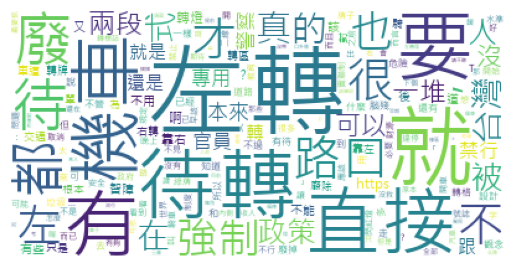

<Figure size 400x600 with 0 Axes>

In [13]:
wc = WordCloud(font_path= "C:\Windows\Fonts\msjh.ttc", 
               background_color="white", 
               max_words=200)

wc.generate_from_frequencies(results2)
 
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(20,30), dpi =20)
plt.show()